# <center>**Prediction of Airbnb guest satisfaction based on their characteristics**</center></h1>
## <center>Data intensive application programming project - 2022/2023</center></h2>
### <center>Salvatore Antonio Addimando <br/> salvatore.addimando@studio.unibo.it <br/> ID: 970539 <br/> <br/> Benedetta Pacilli <br/> benedetta.pacilli@studio.unibo.it <br/> ID: 975296 </center></h3>


### Libraries import

First of all, we import the libraries to perform operations on data
+ NumPy to create and operate on N-dimensional arrays
+ pandas to load and manipulate in tabular format

In [1]:
import numpy as np
import pandas as pd

Other libraries will be imported later when needed

### Data import
The dataset used for this project is an [Airbnb Guest Satisfaction Dataset](https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset) from Kaggle. It contains information about Airbnb listings in 9 european cities and the satisfaction of the guests who stayed there. The dataset is composed of 41715 rows and 19 columns, each row representing a different listing and each column a different feature. The features are the following:
+ **City**: the city where the listing is located
+ **Price**: the price per night of the listing
+ **Day**: indicates if it is a weekday or a weekend
+ **Room type**: the type of room of the listing (entire home, private room or shared room)
+ **Shared room**: indicates if the room is shared by anyone
+ **Private room**: indicates if the Airbnb has a private room available
+ **Person capacity**: maximum number of people that can stay in the listing
+ **Superhost**: indicates if the host is a superhost or not (the superhost status is awarded to experienced and highly-rated hosts who consistently provide exceptional hospitality to their guests)
+ **Multiple rooms**: indicates if the listing has more than one room
+ **Business**: indicates if the business has more than 4 listings
+ **Cleanliness rating**: rating of the cleanliness of the listing (2-10)
+ **Guest satisfaction**: rating of the satisfaction of the guests (20-100)
+ **Bedrooms**: number of bedrooms of the listing
+ **City Center (km)**: distance from the city center in km
+ **Metro Distance (km)**: distance from the nearest metro station in km
+ **Attraction Index**: indicates the number of attractions in the area of the listing (15-4.51k)
+ **Restaurant Index**: indicates the number of restaurants in the area of the listing (19-6.71k)
+ **Normalised Attraction Index**: normalised version of the Attraction Index (0-100)
+ **Normalised Restaurant Index**: normalised version of the Restaurant Index (0-100)

The variable that we want to predict is the **Guest satisfaction**. This variable is a integer variable that ranges from 20 to 100. The other variables are the features that we will use to predict the satisfaction.

Now we can load the dataset. To load the dataset we need to import the os library to get the path of the dataset and the kaggel library to download the dataset directly from Kaggle. Pandas is used to read the dataset file.

In [2]:
import os.path as os
import kaggle
if not os.exists("Aemf1.csv"):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        'dipeshkhemani/airbnb-cleaned-europe-dataset', path='.', unzip=True)
dataset = pd.read_csv('Aemf1.csv')

We now show some more information about the dataset by using the pandas functions `info()` and `head()`.

In [3]:
dataset.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Columns: 19 entries, City to Normalised Restraunt Index
dtypes: bool(3), float64(10), int64(3), object(3)
memory usage: 12.1 MB


In [4]:
dataset.head(5)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


### Data manipulation and analysis
We now perform some operations on the dataset to better understand it and to prepare it for the analysis. First of all, we check if there are any missing values in the dataset.

In [5]:
if dataset.isnull().values.any():
    print("Missing values found")
    # Removing missing values
    dataset = dataset.dropna()
    print("Missing values removed")
else:
    print("No missing values found")

No missing values found


We can see that there are no missing values in the dataset. We can now check the type of each variable:

In [6]:
dataset.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

We want to convert boolean variables to integer variables. We can do this by using the pandas function `astype()`:

In [7]:
dataset["Shared Room"] = dataset["Shared Room"].astype(int)
dataset["Private Room"] = dataset["Private Room"].astype(int)
dataset["Superhost"] = dataset["Superhost"].astype(int)
dataset.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                      int32
Private Room                     int32
Person Capacity                float64
Superhost                        int32
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

In our model we want to only include the variables that have an impact on the guest-satisfaction. To do so we create *n* plots (*n* = numbers of variables - guest-satisfaction), each one showing the relationship between the *n<sup>th</sup>* variable (on the x axis) and the guest-satisfaction (on the y axis).

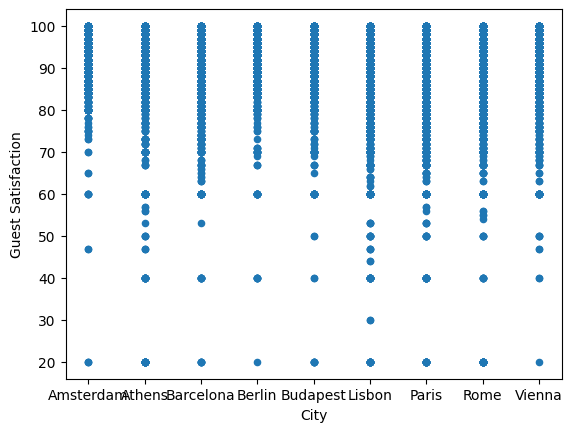

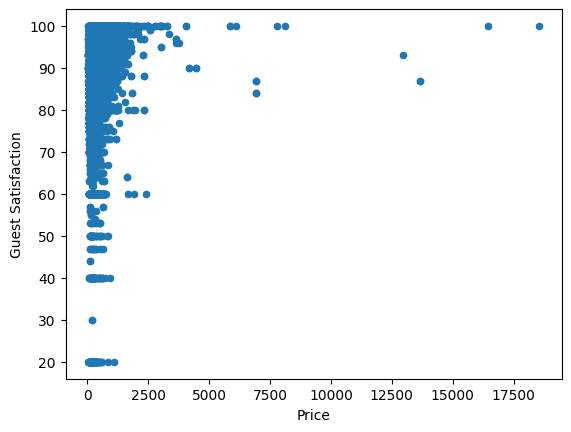

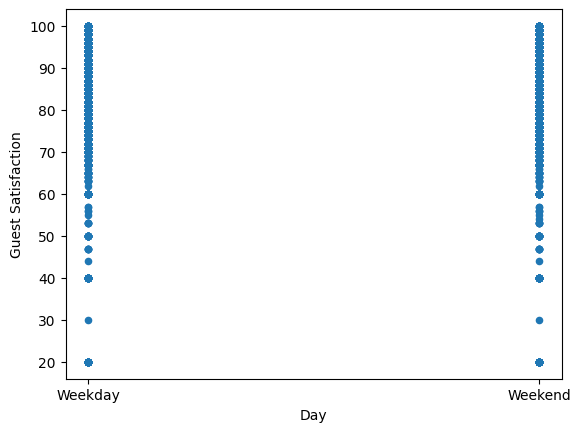

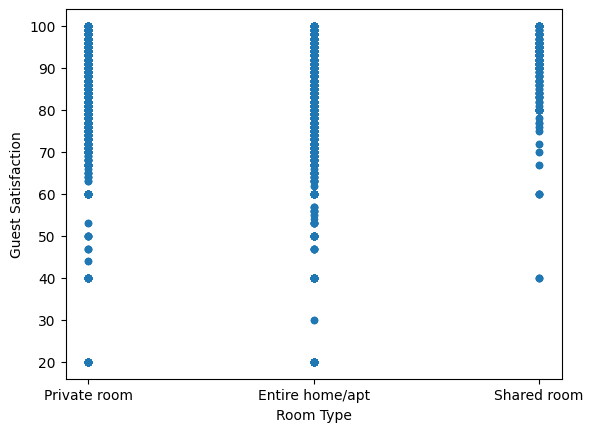

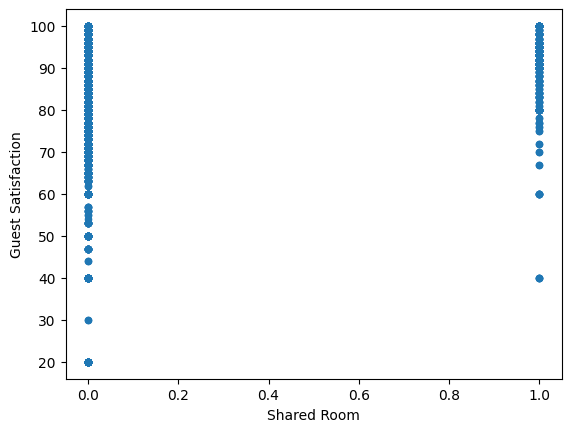

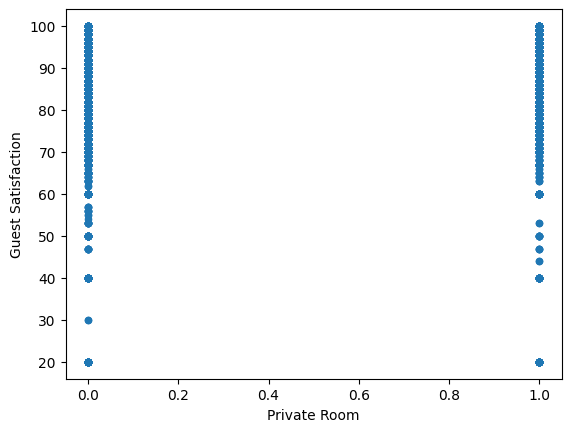

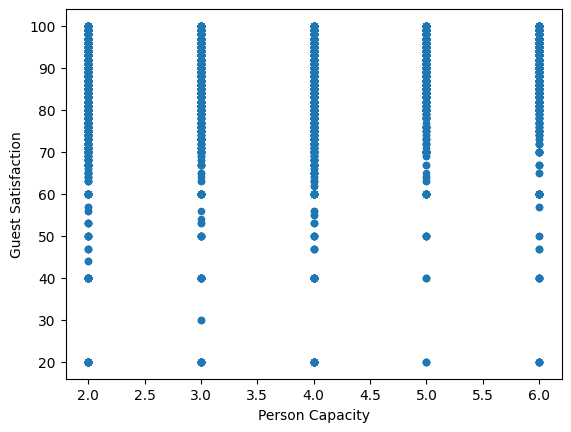

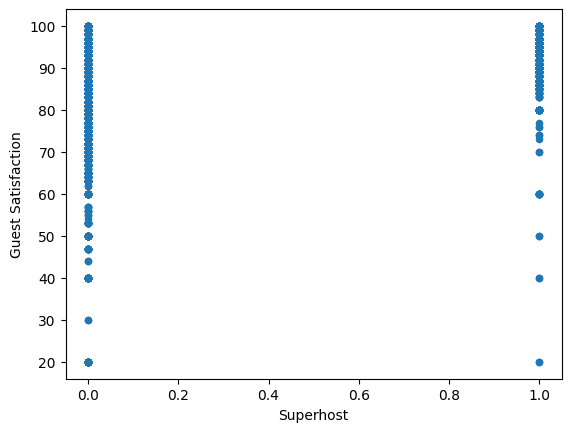

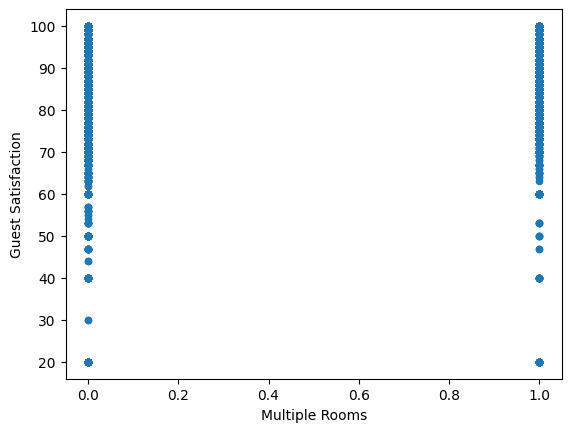

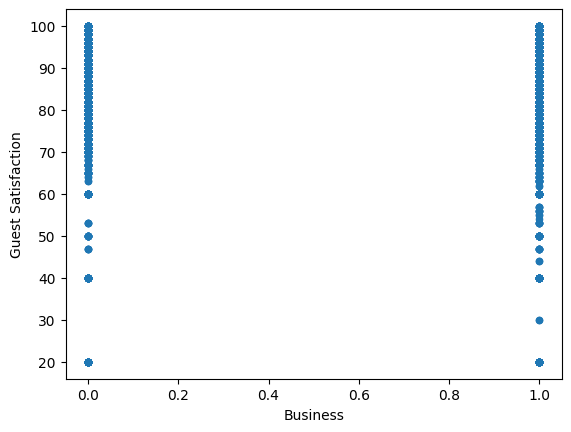

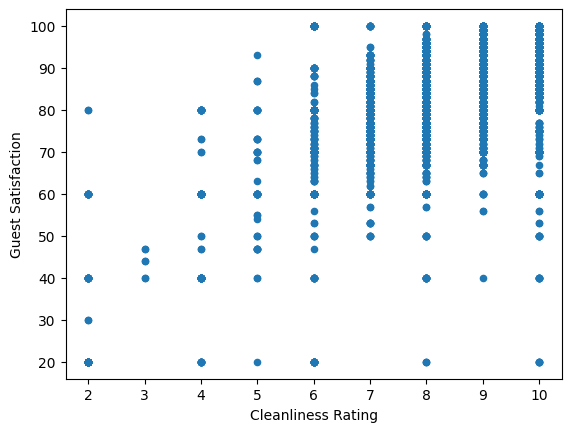

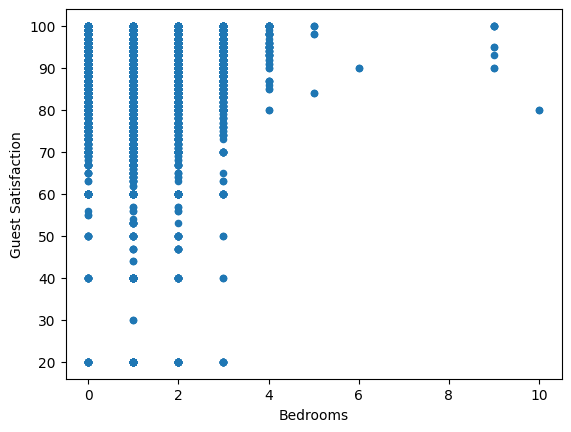

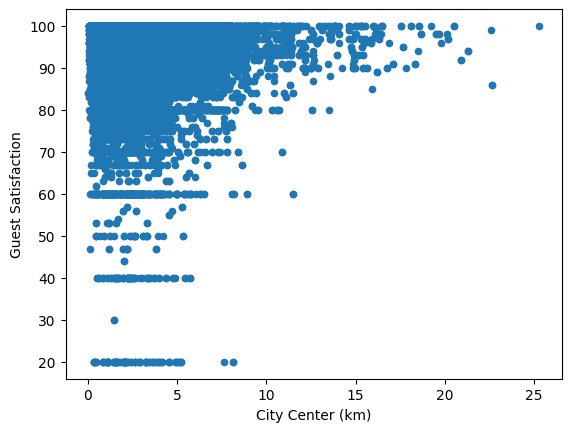

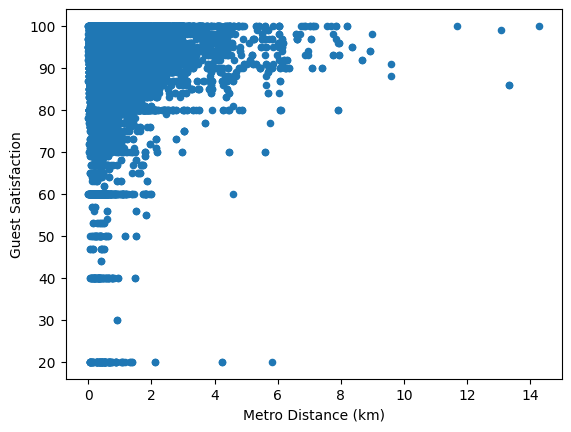

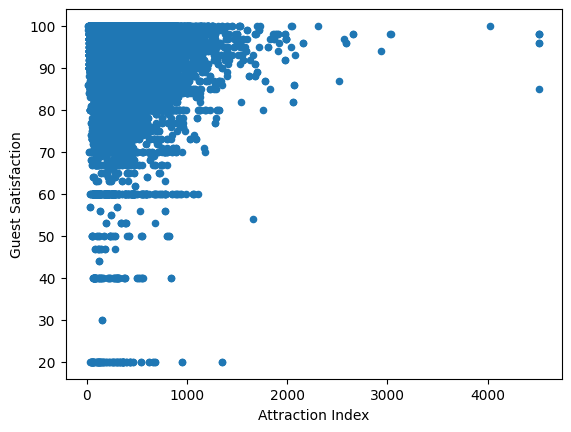

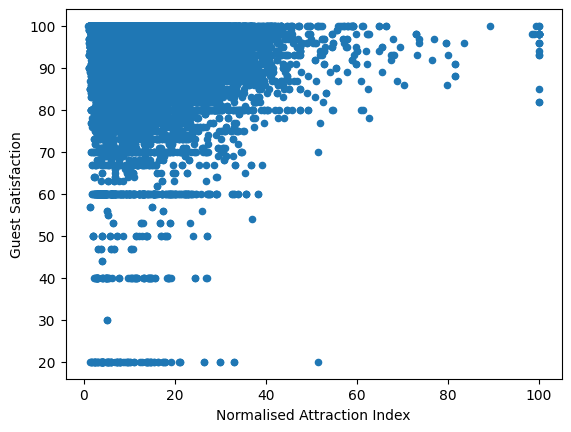

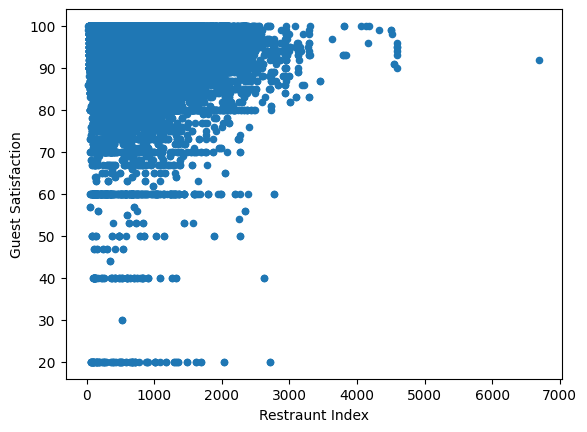

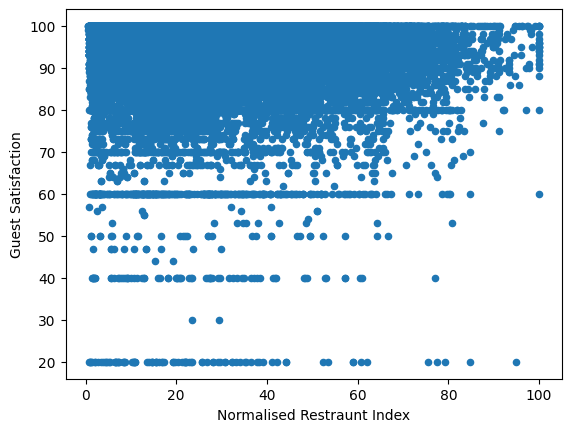

In [8]:
import matplotlib.pyplot as plt

# create a folder to store the plots
if not os.exists("plots"):
    os.mkdir(path="plots")

for column in dataset.columns.drop("Guest Satisfaction"):
    dataset.plot.scatter(x=column, y="Guest Satisfaction").get_figure().savefig(
        "plots/" + column + ".png")

We reckon that the variables that have an impact on the guest-satisfaction are the following:
+ **Price**: the price per night of the listing
+ **Superhost**: indicates if the host is a superhost or not
+ **Cleanliness rating**: rating of the cleanliness of the listing
+ **City Center (km)**: distance from the city center in km
+ **Metro Distance (km)**: distance from the nearest metro station in km
+ **Attraction Index**: indicates the number of attractions in the area of the listing
+ **Restaurant Index**: indicates the number of restaurants in the area of the listing

We believe that the reason why the other variables do not have an impact on the guest-satisfaction is that they are not relevant to the guests. For example, the day or the room type are not relevant to the guests as they do not affect the quality of the listing and they are parameters that were actively chosen by the guests when booking the listing. The same reasoning can be applied to the other variables.

We remove the unwanted variables from the dataset:

In [9]:
dataset = dataset.drop(columns=["Bedrooms", "Business", "City", "Day", "Multiple Rooms", "Person Capacity",
                       "Private Room", "Room Type", "Shared Room", "Normalised Attraction Index", "Normalised Restraunt Index"])

print("Remaining columns:")
print(dataset.columns.values)

Remaining columns:
['Price' 'Superhost' 'Cleanliness Rating' 'Guest Satisfaction'
 'City Center (km)' 'Metro Distance (km)' 'Attraction Index'
 'Restraunt Index']


We now report some statistics and graphs about the variables that we have selected:

In [10]:
dataset.describe()

,Price,Superhost,Cleanliness Rating,Guest Satisfaction,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,0.279498,9.442274,93.103179,2.679792,0.603921,293.905990,626.692618
std,279.408493,0.448758,0.889173,8.141745,1.996684,0.706206,235.750055,520.644720
min,34.779339,0.000000,2.000000,20.000000,0.015045,0.002301,15.152201,19.576924
25%,144.016085,0.000000,9.000000,90.000000,1.275913,0.236693,124.371614,210.459574
50%,203.819274,0.000000,10.000000,95.000000,2.253237,0.391220,228.920599,519.583509
75%,297.373358,1.000000,10.000000,98.000000,3.584489,0.678702,394.000201,860.708156
max,18545.450285,1.000000,10.000000,100.000000,25.284557,14.273577,4513.563486,6696.156772


In the following plot, showing a histogram of the guest satisfaction ratings, we can see that the data is skewed to the right. This means that the majority of the ratings are high, and the number of low ratings is relatively small. This can be seen through the `describe()` function as well, where the guest satisfaction mean is 93.1

Text(0, 0.5, 'Count')

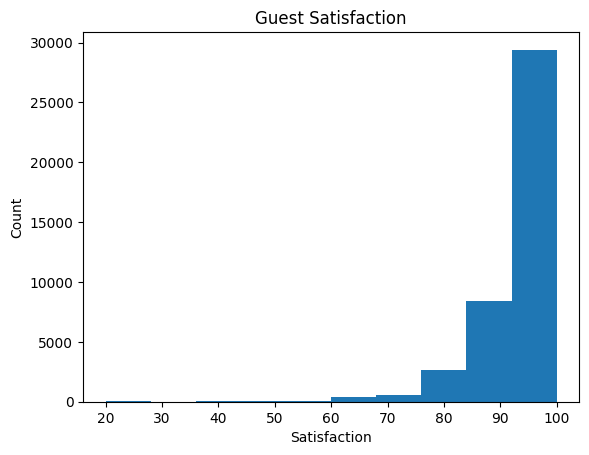

In [11]:
plt.hist(dataset['Guest Satisfaction']);
plt.title("Guest Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Count")

We can also create a pie chart to visualize the distribution of guest satisfaction ratings. More than of the pie chart is occupied by the ratings between 90 and 100.

Text(0.5, 1.0, 'Guest Satisfaction Ratings')

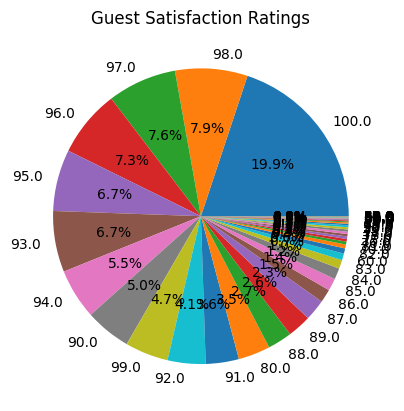

In [12]:
rating_counts = dataset['Guest Satisfaction'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%');
plt.title('Guest Satisfaction Ratings')

The next plot is a box plot comapring guest satisfaction across the different variables.
Prior to the plot creation, we use a MinMaxScaler to scale the parameters data in the range [0,100] so that it is easier to compare the different variables in the plot.

Text(0, 0.5, 'Guest Satisfaction')

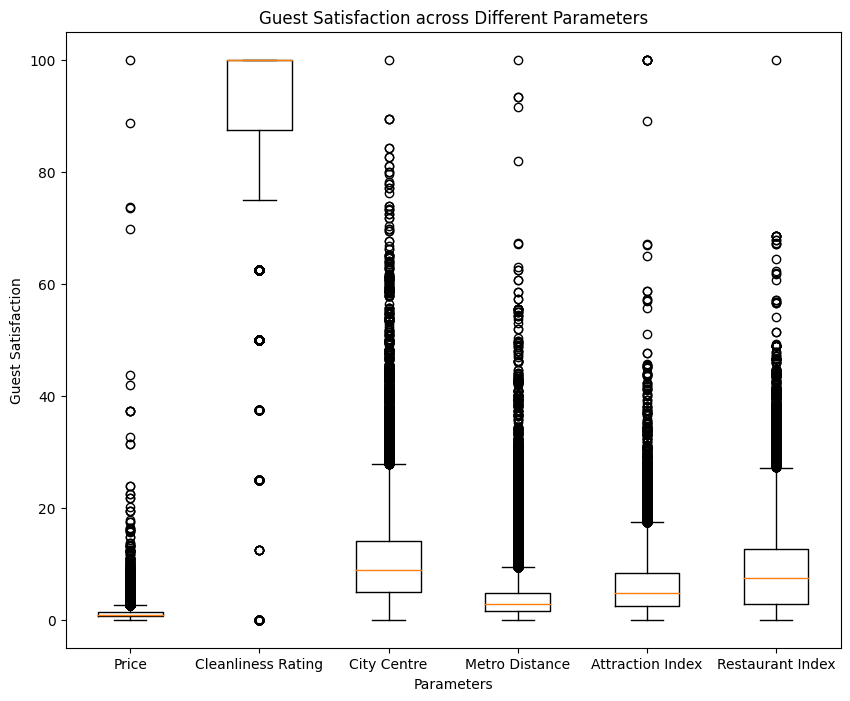

In [13]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Price', 'Cleanliness Rating', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Restraunt Index']

dataset_normalized = dataset[columns_to_normalize].copy()

scaler = MinMaxScaler(feature_range=(0, 100))
dataset_normalized[columns_to_normalize] = scaler.fit_transform(dataset_normalized[columns_to_normalize])


plt.figure(figsize=(10, 8))
plt.boxplot([dataset_normalized['Price'], dataset_normalized['Cleanliness Rating'], dataset_normalized['City Center (km)'], dataset_normalized['Metro Distance (km)'], dataset_normalized['Attraction Index'], dataset_normalized['Restraunt Index']], labels=['Price', 'Cleanliness Rating', 'City Centre', 'Metro Distance', 'Attraction Index', 'Restaurant Index']);

plt.title('Guest Satisfaction across Different Parameters')
plt.xlabel('Parameters')
plt.ylabel('Guest Satisfaction')


 We can see that the guest satisfaction is higher for superhosts, for listings that are closer to the city center and to the metro station, and for listings with a higher number of attractions and restaurants in the area. We can also see that the guest satisfaction is higher for listings with a higher price and a higher cleanliness rating.

#### Data preparation


We divide the remaining variables in two sets:
+ **Numerical columns**: columns that contain numerical values
+ **Binary columns**: columns that contain boolean values

In [14]:
numerical_columns = ['Price', 'Cleanliness Rating',
                     'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Restraunt Index']
binary_columns = ['Superhost']

We now separate the dataset into the training set and the test set with a 80:20 ratio. We use the function `train_test_split()` from the sklearn library to do so.

We are also going to remove the target column from the test set, as we don't want to use it to predict the target.

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

x_train = train_set.drop(columns=["Guest Satisfaction"])
y_train = train_set["Guest Satisfaction"]
x_test = test_set.drop(columns=["Guest Satisfaction"])
y_test = test_set["Guest Satisfaction"]

### Creating the model
We now create the model. We are going to try different strategies to find the best model. The strategies that we are going to try are the following:
+ **Linear Regression**
+ **Ridge Regression**
+ **Elastic Net Regression**
+ **KernelRidge Regression**
+ **Regression Trees**
+ **XGBoost Regressor**
+ **Random Forest Regressor**

In order to compare the different models we are going to use the following metrics:
+ **Mean Absolute Error (MAE)**: the mean of the absolute value of the errors
+ **Relative Error (RE)**: the mean of the absolute value of the relative errors
+ **R squared (R<sup>2</sup>)**: the coefficient of determination

The functions to calculate and print the metrics are the following:

In [16]:
from sklearn.metrics import mean_squared_error, r2_score #TODO: explain that we did different tests and presents the results, present the best one, do the grid search with the best one and show the importance of the parameters with the code on the test.py file

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))


def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = relative_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

#### Testing Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

model_poli_std_lin = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
], verbose=True)

model_poli_std_lin.fit(x_train, y_train)

print("Training set:")
print_eval(x_train, y_train, model_poli_std_lin)

print("Test set:")
print_eval(x_test, y_test, model_poli_std_lin)

[Pipeline] .............. (step 1 of 3) Processing poly, total=   0.0s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ............ (step 3 of 3) Processing linear, total=   0.3s
Training set:
   Mean squared error: 31.712
       Relative error: 4.40707%
R-squared coefficient: 0.51785
Test set:
   Mean squared error: 32.585
       Relative error: 4.51918%
R-squared coefficient: 0.52314


#### Testing Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

model_poli_std_rdg = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1))
], verbose=True)

model_poli_std_rdg.fit(x_train, y_train)

print("Training set:")
print_eval(x_train, y_train, model_poli_std_rdg)

print("Test set:")
print_eval(x_test, y_test, model_poli_std_rdg)

[Pipeline] .............. (step 1 of 3) Processing poly, total=   0.1s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing ridge, total=   0.1s
Training set:
   Mean squared error: 31.767
       Relative error: 4.41478%
R-squared coefficient: 0.51702
Test set:
   Mean squared error: 32.526
       Relative error: 4.52117%
R-squared coefficient: 0.524


#### Testing Elastic Net Regression

In [19]:
from sklearn.linear_model import ElasticNet

model_poli_std_en = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.8))
], verbose=True)

model_poli_std_en.fit(x_train, y_train)

print("Training set:")
print_eval(x_train, y_train, model_poli_std_en)

print("Test set:")
print_eval(x_test, y_test, model_poli_std_en)

[Pipeline] .............. (step 1 of 3) Processing poly, total=   0.0s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing elasticnet, total=   1.8s
Training set:
   Mean squared error: 33.599
       Relative error: 4.64364%
R-squared coefficient: 0.48916
Test set:
   Mean squared error: 33.605
       Relative error: 4.68173%
R-squared coefficient: 0.50822


Linear Regression, Ridge Regression and Elastic Net Regression are all linear models. They all have a similar performance but it is not the best performance that we can get. We can try to use a non-linear model to see if we can get a better performance.

#### Testing KernelRidge Regression

We tried testing KernelRidge Regression but we could not complete the training as it was taking too long. We decided to not use it but we are going to keep the code in the notebook for future reference.

In [20]:
from sklearn.kernel_ridge import KernelRidge

model_poli_std_krr = Pipeline([
    ('scaler', StandardScaler()),
    ('krr', KernelRidge(alpha=1, kernel='poly', degree=1))
], verbose=True)

model_poli_std_krr.fit(x_train, y_train)

print("Training set:")
print_eval(x_train, y_train, model_poli_std_krr)

print("Test set:")
print_eval(x_test, y_test, model_poli_std_krr)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s


c:\Users\bened\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


#### Testing Regression Trees

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

model_poli_std_dtr = Pipeline([
    ('preproc', ColumnTransformer(transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), binary_columns),
        ('poly', PolynomialFeatures(degree=2, include_bias=False), numerical_columns),
        ('scaler', StandardScaler(), numerical_columns),
    ], remainder='passthrough', verbose=True)),
    ('dtr', DecisionTreeRegressor(random_state=42))
], verbose=True)

model_poli_std_dtr.fit(x_train, y_train)

print("Training set:")
print_eval(x_train, y_train, model_poli_std_dtr)

print("Test set:")
print_eval(x_test, y_test, model_poli_std_dtr)

[ColumnTransformer] ........ (1 of 3) Processing onehot, total=   0.0s
[ColumnTransformer] .......... (2 of 3) Processing poly, total=   0.0s
[ColumnTransformer] ........ (3 of 3) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing dtr, total=   2.5s
Training set:
   Mean squared error: 0.0
       Relative error: 0.00000%
R-squared coefficient: 1.0
Test set:
   Mean squared error: 29.053
       Relative error: 2.89586%
R-squared coefficient: 0.57483


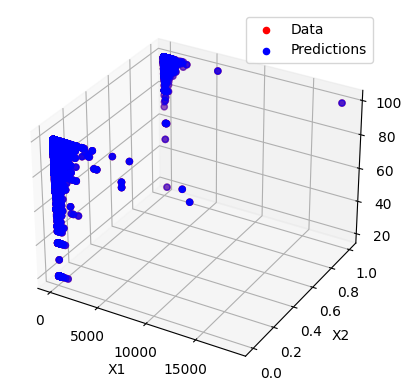

In [28]:
def plot_model_on_data(model, x, y):
    preds = model.predict(x)
    x_np = x.to_numpy()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_np[:, 0], x_np[:, 1], y, color='red', label='Data')
    ax.scatter(x_np[:, 0], x_np[:, 1], preds, color='blue', label='Predictions')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    plt.legend()

plot_model_on_data(model_poli_std_dtr, x_train, y_train)

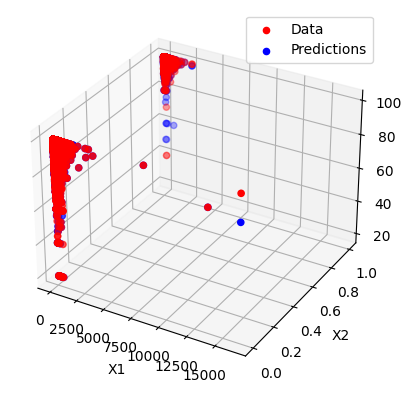

In [29]:
plot_model_on_data(model_poli_std_dtr, x_test, y_test)

With Regression Trees the model is overfitting the training data. We can see this by looking at the R<sup>2</sup> score of the training set and the test set. The R<sup>2</sup> score of the training set is 1.0 while the R<sup>2</sup> score of the test set is 0.57. This means that the model is not able to generalize well on unseen data.

#### Testing XGBoost Regressor

In [30]:
from xgboost import XGBRegressor

model_poli_std_xgb = Pipeline([
    ('preproc', ColumnTransformer(transformers=[
        # ('onehot', OneHotEncoder(sparse_output=False), binary_columns),
        # ('poly', PolynomialFeatures(degree=2, include_bias=False), numerical_columns),
        ('scaler', StandardScaler(), numerical_columns),
    ], remainder='passthrough', verbose=True)),
    ('xgb', XGBRegressor(objective='reg:squarederror', reg_alpha=0.0,
     reg_lambda=1.0, n_estimators=200, verbose_eval=True))
], verbose=True)

model_poli_std_xgb.fit(x_train, y_train)

print("Training set:")
print_eval(x_train, y_train, model_poli_std_xgb)

print("Test set:")
print_eval(x_test, y_test, model_poli_std_xgb)

[ColumnTransformer] ........ (1 of 2) Processing scaler, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.0s
[11:22:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

[Pipeline] ............... (step 2 of 2) Processing xgb, total=   4.3s
Training set:
   Mean squared error: 13.015
       Relative error: 2.90445%
R-squared coefficient: 0.80212
Test set:
   Mean squared error: 24.592
       Relative error: 3.88894%
R-squared coefficient: 0.64012


XGBoost Regressor provides a better performance than the previous models, both on the training set and on the test set.

#### Testing Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

model_poli_std_rfr = Pipeline([
    ('preproc', ColumnTransformer(transformers=[
        ('scaler', StandardScaler(), numerical_columns),
    ], remainder='passthrough', verbose=True)),
    ('rfr', RandomForestRegressor(n_estimators=200, max_features="log2", n_jobs=-1))
], verbose=True)

model_poli_std_rfr.fit(x_train, y_train)

print("Training set:")
print_eval(x_train, y_train, model_poli_std_rfr)

print("Test set:")
print_eval(x_test, y_test, model_poli_std_rfr)

[ColumnTransformer] ........ (1 of 2) Processing scaler, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing rfr, total=   7.9s
Training set:
   Mean squared error: 2.3055
       Relative error: 1.12201%
R-squared coefficient: 0.96495
Test set:
   Mean squared error: 17.732
       Relative error: 3.07376%
R-squared coefficient: 0.7405


This is our best model. It provides the best performance on both the training set and on the test set. We decided to perform a **grid search** to find the best parameters for theis model.

In [32]:
from sklearn.model_selection import GridSearchCV

print("Grid Search for Random Forest Regressor")
grid_params = {
    'rfr__max_features': [None, 'sqrt', 'log2'],
    'rfr__min_samples_split': [2, 5, 10],
    'rfr__min_samples_leaf': [1, 2, 4],
    'rfr__bootstrap': [True, False]
}

grid_search = GridSearchCV(
    model_poli_std_rfr, grid_params, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Grid Search for Random Forest Regressor


KeyboardInterrupt: 